# Predict Heart Disease using Machine Learning

This notebook uses various python-based machine learning and data science libraries to build a model capable of predicting whether someone had heart disease or not based on their medical conditions.

Strategy:
  
  1. Problem Definition
  2. Data 
  3. Evaluation
  4. Features
  5. Modelling
  6. Experimentation


## 1. Problem Definition

> Given clinical paramters about a patient, can we predict whether or not they have heart disease? 

## 2. Data

> The original data came from the Cleavland data from the UCI Machine Learning Repository. https://archive.ics.uci.edu/ml/datasets/heart+Disease

> There is also a version of it available on Kaggle. https://www.kaggle.com/ronitf/heart-disease-uci

## 3. Evaluation

> If we can reach 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept, we'll pursue the project.

## 4. Features

> This is where you'll get different information about each of the features in your data. You can do this via doing your own research (such as looking at the links above) or by talking to a subject matter expert (someone who knows about the dataset).

#### Data dictionary

   1. age - age in years
   2. sex - (1 = male; 0 = female)
   3. cp - chest pain type
   
        0: Typical angina: chest pain related decrease blood supply to the heart
        1: Atypical angina: chest pain not related to heart
        2: Non-anginal pain: typically esophageal spasms (non heart related)
        3: Asymptomatic: chest pain not showing signs of disease
   4. trestbps - resting blood pressure (in mm Hg on admission to the hospital) anything above 130-140 is typically cause for concern
   5. chol - serum cholestoral in mg/dl
        serum = LDL + HDL + .2 * triglycerides above 200 is cause for concern
   6. fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)'>126' mg/dL signals diabetes
   7. restecg - resting electrocardiographic results
   
        0: Nothing to note
        1: ST-T Wave abnormality can range from mild symptoms to severe problems signals non-normal heart beat
        
        2: Possible or definite left ventricular hypertrophy
        3: Enlarged heart's main pumping chamber
        
   8. thalach - maximum heart rate achieved
   9. exang - exercise induced angina (1 = yes; 0 = no)
   10. oldpeak - ST depression induced by exercise relative to rest looks at stress of heart during excercise unhealthy heart will stress more
   11. slope - the slope of the peak exercise ST segment
   
        0: Upsloping: better heart rate with excercise (uncommon)
        
        1: Flatsloping: minimal change (typical healthy heart)
        
        2: Downslopins: signs of unhealthy heart
   12. ca - number of major vessels (0-3) colored by flourosopy
        colored vessel means the doctor can see the blood passing through
        the more blood movement the better (no clots)
        
   13. thal - thalium stress result
        1,3: normal
        6: fixed defect: used to be defect but ok now
        7: reversable defect: no proper blood movement when excercising
   14. target - have disease or not (1=yes, 0=no) (= the predicted attribute)

### Preparing the tools

Using pandas, Matplotlib and NumPy for data analysis and manipulation.
    

In [1]:
# Importing all the required toold

# EDA and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# plotting all the graphs inside the notebook
%matplotlib inline

# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

### Load Data

In [2]:
df = pd.read_csv("heart-disease-data.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
df.shape # (rows, columns)

(303, 14)

### Exploring Data

Finding more information of the data

Steps:

    1. What problem to solve
    2. What kind of data present and how to treat different types of data
    3. Handling missing data
    4. Where are the outliers and Why should we consider them?
    5. How to add, remove or change features to get the most out of the data

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [6]:
df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

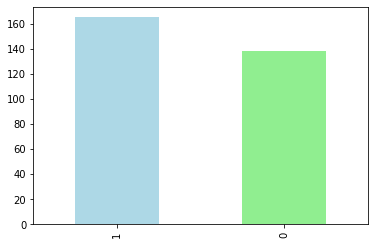

In [7]:
df["target"].value_counts().plot(kind = "bar", color = ["lightblue", "lightgreen"])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [9]:
# checking for missing values
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [10]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


#### Heart disease frequency according to Sex

In [11]:
df["sex"].value_counts()

1    207
0     96
Name: sex, dtype: int64

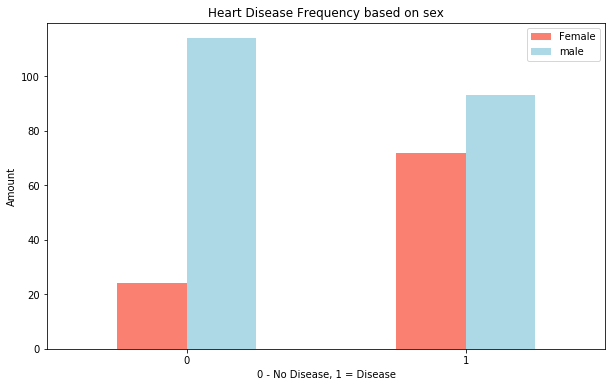

In [12]:
# Compare target column with sex column
pd.crosstab(df.target, df.sex).plot(kind = "bar", figsize = (10, 6), color = ["salmon", "lightblue"])
plt.title("Heart Disease Frequency based on sex")
plt.xlabel("0 - No Disease, 1 = Disease")
plt.ylabel("Amount")
plt.legend(["Female", "male"])
plt.xticks(rotation = 0);

#### Age vs Max Heart Rate for Heart Disease

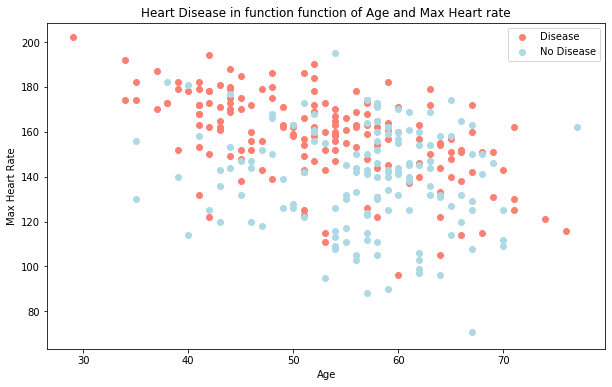

In [13]:
# Create a Figure
plt.figure(figsize = (10, 6))

# Scatter with positive examples
plt.scatter(df.age[df.target == 1],
            df.thalach[df.target == 1],
            c = "salmon")

# Scatter for negative examples
plt.scatter(df.age[df.target == 0],
            df.thalach[df.target == 0],
            c = "lightblue");

# Add some help info
plt.title('Heart Disease in function function of Age and Max Heart rate')
plt.xlabel('Age')
plt.ylabel('Max Heart Rate')
plt.legend(["Disease", "No Disease"])

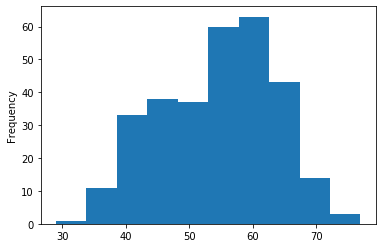

In [14]:
# Check the distribution of age using Histogram
df.age.plot.hist()

#### Heart disease frequency per chest pain type

cp - chest pain type
   
        0: Typical angina: chest pain related decrease blood supply to the heart
        1: Atypical angina: chest pain not related to heart
        2: Non-anginal pain: typically esophageal spasms (non heart related)
        3: Asymptomatic: chest pain not showing signs of disease

In [15]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


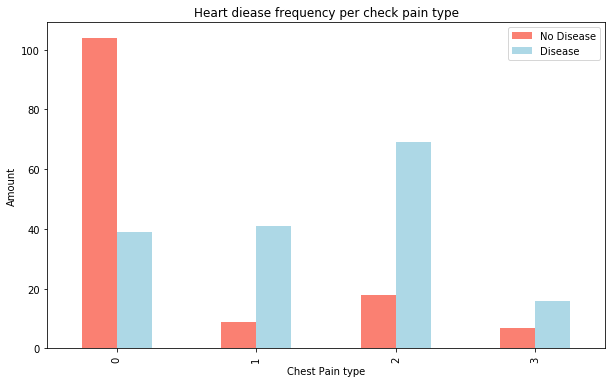

In [16]:
# Visualizing
pd.crosstab(df.cp, df.target).plot(kind = "bar",
                                   figsize = (10,6),
                                   color = ["salmon", "lightblue"])

plt.title("Heart diease frequency per check pain type")
plt.xlabel("Chest Pain type")
plt.ylabel("Amount")
plt.legend(["No Disease", "Disease"])

In [17]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


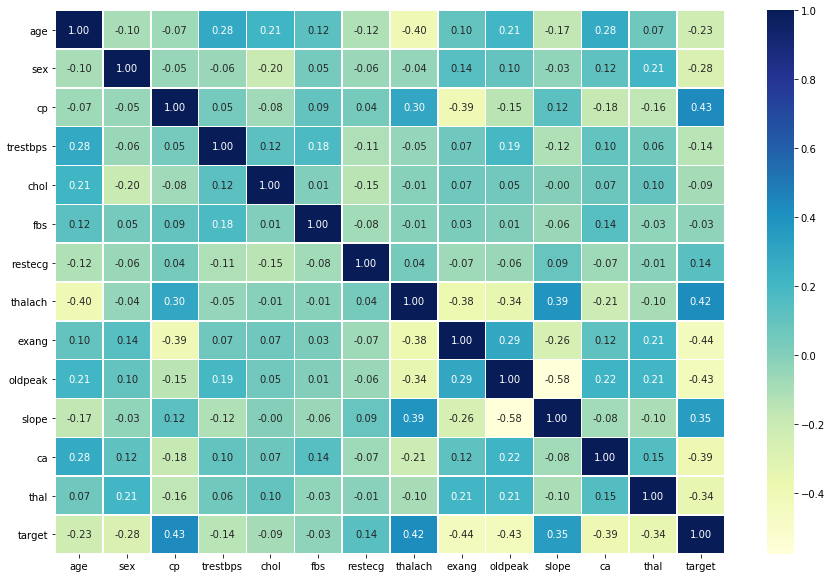

In [18]:
# Make a correlation matrix

corr_matrix = df.corr()
fig, ax = plt.subplots(figsize = [15,10])
ax = sns.heatmap(corr_matrix,
                 annot = True,
                 linewidths = 0.5,
                 fmt = ".2f",
                 cmap = "YlGnBu")

## 5. Modelling

In [19]:
# Split into x and y

x = df.drop("target", axis = 1)
y = df.target

In [20]:
# Split data into train and test sets

np.random.seed(8)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

Using 3 different Models:
1. Logistic Regression
2. K-Nearest Neighbours Classifier
3. Random Forest Classifier

In [23]:
# Put models in dictionary
models = {
          "Logistic Regression": LogisticRegression(),
          "KNN": KNeighborsClassifier(),
          "Random Forest": RandomForestClassifier()
         }

# Create a function to fit and score models
def fit_and_score(models, x_train, x_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models
    models: a dictionary of different ML models
    x_train: training data (without labels)
    x_test: testing data (without labels)
    y_train: training labels
    y_test: testing labels
    """
    # Set random seed
    np.random.seed(8)
    
    # Make a dictionary to store model scores
    model_scores = {}
    
    # Loop throught the models
    for name, model in models.items():
        # Fitting the model
        model.fit(x_train, y_train)
        
        # Evaluating the model
        model_scores[name] = model.score(x_test, y_test)
    
    return model_scores

In [25]:
model_scores = fit_and_score(models = models,
                             x_train = x_train,
                             x_test = x_test,
                             y_train = y_train,
                             y_test = y_test)

model_scores

D:\CODING\Anaconda\Heart-Disease-Project\env\lib\site-packages\sklearn\linear_model\_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8688524590163934,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8524590163934426}

#### Model Comparison

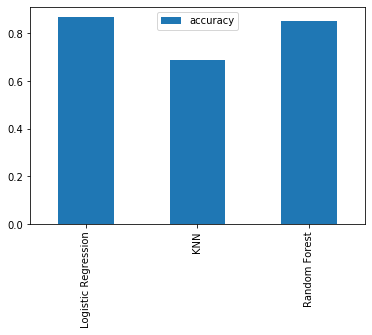

In [27]:
model_compare = pd.DataFrame(model_scores, index = ["accuracy"])
model_compare.T.plot.bar();

## 6. Tuning the Model

- Hyperparameter Turing
- Feature Importance
- Confusion matrix
- Cross-validation
- Precision
- Recall
- F1 score
- Classification report
- ROC curve
- AUC

#### Hyperparameters tuning

In [30]:
# Tuning KNN

train_scores = []
test_scores  = []

# Create a list of different values for n negihbors
neighbors = range(1,21)

# Setup KNN instance
knn = KNeighborsClassifier()

# Loop through different n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors = i)
    
    # Fit the model
    knn.fit(x_train, y_train)
    
    # Update the training scores list
    train_scores.append(knn.score(x_train, y_train))
    
    # Update the test scores list
    test_scores.append(knn.score(x_test, y_test))

In [31]:
train_scores

[1.0,
 0.8057851239669421,
 0.7933884297520661,
 0.768595041322314,
 0.7644628099173554,
 0.7479338842975206,
 0.731404958677686,
 0.7148760330578512,
 0.7107438016528925,
 0.6859504132231405,
 0.6942148760330579,
 0.6735537190082644,
 0.6942148760330579,
 0.6735537190082644,
 0.6694214876033058,
 0.6570247933884298,
 0.6652892561983471,
 0.6611570247933884,
 0.6528925619834711,
 0.6611570247933884]

In [32]:
test_scores

[0.639344262295082,
 0.4426229508196721,
 0.6229508196721312,
 0.6229508196721312,
 0.6885245901639344,
 0.6885245901639344,
 0.6557377049180327,
 0.6721311475409836,
 0.6557377049180327,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6557377049180327,
 0.6885245901639344,
 0.639344262295082,
 0.6721311475409836,
 0.6557377049180327,
 0.6557377049180327,
 0.639344262295082,
 0.6557377049180327]

Max KNN score on the test data: 68.85


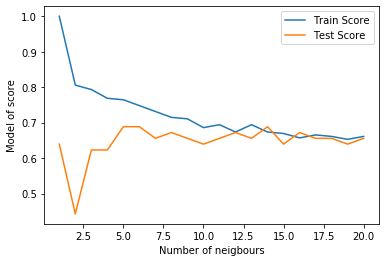

In [33]:
plt.plot(neighbors, train_scores, label = "Train Score")
plt.plot(neighbors, test_scores, label = "Test Score")
plt.xlabel("Number of neigbours")
plt.ylabel("Model of score")
plt.legend()

print(f"Max KNN score on the test data: {max(test_scores)*100:0.2f}")

### Hyperparamter turning using RandomizedSearchCV

Tuning:
- LogisticRegression()
- RandomForestClassifier()


In [42]:
# Creating a Hyperparameter grid for LogisticRegression()
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

# Create a Hyperparamter grid for RandomForestClassifier()
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10 ],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

In [43]:
# Turning LogisticRegression()

np.random.seed(8)

# Setup random hyperparameter search for logisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv = 5,
                                n_iter = 20,
                                verbose = True)

# Fit the random hyperparameter model
rs_log_reg.fit(x_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.9s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='auto', n_jobs=None,
                                                penalty='l2', random_state=None,
                                                solver='lbfgs', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='deprecated', n_iter=20, n_jobs=None,
                   param_distributions={'C':...
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+0

In [44]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 1.623776739188721}

In [45]:
rs_log_reg.score(x_test, y_test)

0.8688524590163934

In [47]:
# Tuning RandomForest

np.random.seed(8)

# Setup random hyperparameter search
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=rf_grid,
                           cv = 5,
                           n_iter = 20,
                           verbose = True
                          )

# Fit the random hyperparameter model
rs_rf.fit(x_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  2.3min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [48]:
# Find the best parameters
rs_rf.best_params_

{'n_estimators': 810,
 'min_samples_split': 12,
 'min_samples_leaf': 3,
 'max_depth': 3}

In [49]:
rs_rf.score(x_test, y_test)

0.9016393442622951

### Hyperparameter tuning useing GridSearchCV

In [51]:
# Different hyperparameter for LogisticRegression()
log_reg_grid = {"C": np.logspace(-4, 4, 30),
                "solver": ["liblinear"]}

# Setup grid search CV
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv = 5,
 
                          verbose = True)

# Fitting the hyperparameter search model
gs_log_reg.fit(x_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    1.1s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': array([1.00000000e-04, 1.8...
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5

In [52]:
gs_log_reg.best_params_

{'C': 1.3738237958832638, 'solver': 'liblinear'}

In [53]:
gs_log_reg.score(x_test, y_test)

0.8688524590163934

### Evaluating the model

- Confusion matrix
- Precision
- Recall
- F1 score
- Classification report
- ROC curve
- AUC

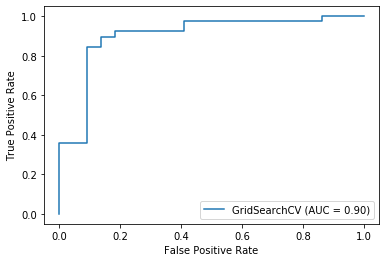

In [56]:
# Make predictions
y_preds = gs_log_reg.predict(x_test)

# ROC Curve
plot_roc_curve(gs_log_reg, x_test, y_test);

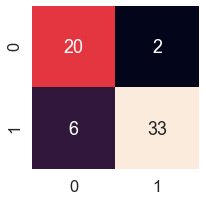

In [59]:
# Confusion Matrix using seaborn
sns.set(font_scale=1.5)

def plot_conf_matrix(y_test, y_preds):
    """
    Plots a good locking confusion matrix using Seaborn's Heat Map 
    """
    fig, ax = plt.subplots(figsize = (3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot = True,
                     cbar = False)
    
plot_conf_matrix(y_test, y_preds)


In [60]:
# Classsification report
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.77      0.91      0.83        22
           1       0.94      0.85      0.89        39

    accuracy                           0.87        61
   macro avg       0.86      0.88      0.86        61
weighted avg       0.88      0.87      0.87        61



### Calculate evaluation metrics using cross-validation

In [61]:
# Check best hyperparameters
gs_log_reg.best_params_

{'C': 1.3738237958832638, 'solver': 'liblinear'}

In [73]:
# Create new classifier with best parameters
clf = LogisticRegression(C = 1.3738237958832638,
                         solver = 'liblinear')

In [74]:
# Cross-validated Accuracy
cv_acc = cross_val_score(clf, x, y, cv = 5, scoring="accuracy")
cv_acc = np.mean(cv_acc)
cv_acc

0.8215300546448088

In [75]:
# Cross-validated Precision
cv_precision = cross_val_score(clf, x, y, cv = 5, scoring="precision")
cv_precision = np.mean(cv_precision)
cv_precision

0.817900063251107

In [76]:
# Cross-validated Recall
cv_recall = cross_val_score(clf, x, y, cv = 5, scoring="recall")
cv_recall = np.mean(cv_recall)
cv_recall

0.8727272727272727

In [78]:
# Cross-validated F1
cv_f1 = cross_val_score(clf, x, y, cv = 5, scoring="f1")
cv_f1 = np.mean(cv_f1)
cv_f1

0.8431741323998502

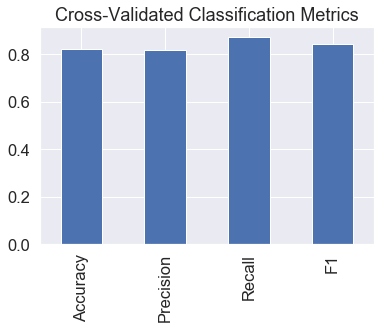

In [81]:
# Visualizing the CV metrics
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                          "Precision": cv_precision,
                          "Recall": cv_recall,
                          "F1": cv_f1},
                          index = [0])

cv_metrics.T.plot.bar(title = "Cross-Validated Classification Metrics",
                      legend = False);


### Feature Importance

Which features contributed most to the outcome of the model and how?


In [83]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [87]:
# Fit and instance of LogisticsRegression
clf = LogisticRegression(C = 1.3738237958832638,
                         solver = "liblinear")

clf.fit(x_train, y_train);

In [88]:
# Check coef_
clf.coef_

array([[ 0.01208101, -1.39737308,  0.79051191, -0.01819584, -0.00545541,
         0.52989738,  0.40500531,  0.03635585, -0.73140733, -0.3777149 ,
         0.55883361, -0.90322323, -0.97454352]])

In [92]:
# Match coef's of features to columns
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

{'age': 0.01208100964722117,
 'sex': -1.397373079886946,
 'cp': 0.7905119100811954,
 'trestbps': -0.018195840802283748,
 'chol': -0.005455407401598645,
 'fbs': 0.5298973806527622,
 'restecg': 0.4050053098154721,
 'thalach': 0.03635584671893393,
 'exang': -0.7314073283094302,
 'oldpeak': -0.37771490221953946,
 'slope': 0.5588336067504889,
 'ca': -0.9032232300404509,
 'thal': -0.9745435222190846}

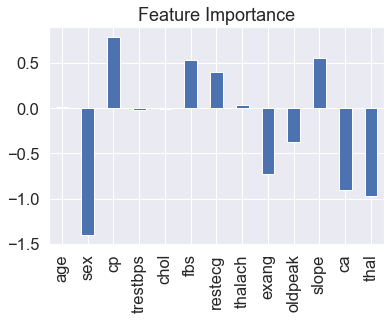

In [96]:
# Visualize feature importance
feature_df = pd.DataFrame(feature_dict, index = [0])
feature_df.T.plot.bar(title = "Feature Importance",
                 legend = False);

In [101]:
pd.crosstab(df.sex, df.target)

target,0,1
sex,,
0,24,72
1,114,93


In [100]:
pd.crosstab(df.slope, df.target)

target,0,1
slope,,
0,12,9
1,91,49
2,35,107


slope - the slope of the peak exercise ST segment
   
0: Upsloping: better heart rate with excercise (uncommon)
     
1: Flatsloping: minimal change (typical healthy heart)
        
2: Downslopins: signs of unhealthy heart

# 6. Experimentation

If the model evalutaion metric isn't upto the mark

- Collect more data
- Try better models eg. CatBoost, XGBoost
- Improve current model
